In [71]:
import numpy as np
import scipy as sp
import os.path

path='/Users/apple/Desktop/web_traffic.tsv'
data=np.genfromtxt(path, delimiter='\t')

In [72]:
x=data[:,0]
y=data[:,1]

print(np.sum(np.isnan(y)))

x=x[~np.isnan(y)]
y=y[~np.isnan(y)]

8


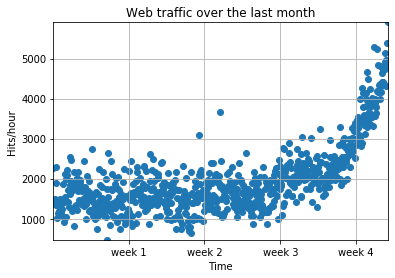

In [73]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' %w for w in range(10)])

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [74]:
def error(f,x,y):
    return np.sum((f(x)-y)**2)

In [75]:
fp1,res,rank,sv,rcond=np.polyfit(x,y,1,full=True)
# indicate all parameter is necessary

In [76]:
print('Model Parameters: %s' %  fp1 )

Model Parameters: [  2.59619213 989.02487106]


In [77]:
res

array([3.17389767e+08])

In [78]:
f1=np.poly1d(fp1)

In [79]:
f1

poly1d([  2.59619213, 989.02487106])

In [80]:
error(f1,x,y)

317389767.339778

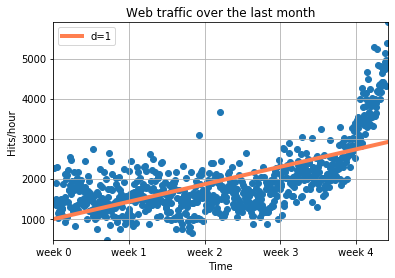

In [81]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' %w for w in range(10)])

fx=np.linspace(0,x[-1])
plt.plot(fx,f1(fx),linewidth=4,color='coral')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [82]:
f2p=np.polyfit(x,y,2)

In [83]:
f2p

array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [84]:
f2=np.poly1d(f2p)

In [85]:
f2

poly1d([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [86]:
error(f2,x,y)

179983507.8781792

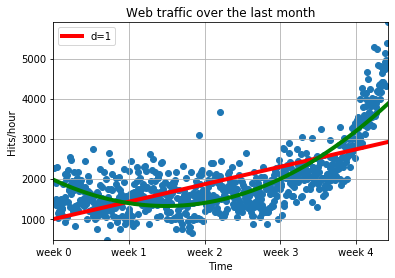

In [87]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' %w for w in range(10)])

fx=np.linspace(0,x[-1])
plt.plot(fx,f1(fx),linewidth=4,color='red')
plt.legend(["d=%i" % f1.order], loc="upper left")


fx=np.linspace(0,x[-1])
plt.plot(fx,f2(fx),linewidth=4,color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

In [88]:
f3p=np.polyfit(x,y,100)
f3=np.poly1d(f3p)

/Users/apple/PycharmProjects/PRACTICE/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


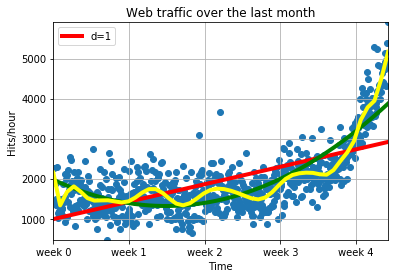

In [89]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' %w for w in range(10)])

fx=np.linspace(0,x[-1])
plt.plot(fx,f1(fx),linewidth=4,color='red')
plt.legend(["d=%i" % f1.order], loc="upper left")


fx=np.linspace(0,x[-1])
plt.plot(fx,f2(fx),linewidth=4,color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")

fx=np.linspace(0,x[-1])
plt.plot(fx,f3(fx),linewidth=4,color='yellow')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()

# Stepping back to go forward – another look at our data
 It seems that there is an inflection point between weeks 3 and 4. So let us separate the data and train two lines using week 3.5 as a separation point. 

In [121]:
inflection = int(3.5*7*24) # calculate the inflection point in hours 
inflection 

588

In [122]:
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

In [123]:
fa=np.poly1d(np.polyfit(xa,ya,1))
fb=np.poly1d(np.polyfit(xb,yb,1))

In [124]:
fa_error=error(fa,xa,ya)

In [125]:
fb_error=error(fb,xb,yb)

In [127]:
print('Error inflection=%f' %(fa_error+fb_error))

Error inflection=132950348.197616


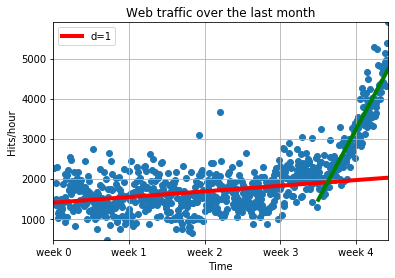

In [131]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' %w for w in range(10)])

fx=np.linspace(0,x[-1])
plt.plot(fx,fa(fx),linewidth=4,color='red')
plt.legend(["d=%i" % f1.order], loc="upper left")


fx=np.linspace(inflection ,xb[-1])
plt.plot(fx,fb(fx),linewidth=4,color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.autoscale(tight=True)
plt.grid()
plt.show()